In [15]:
# imports
import re
import matplotlib.pyplot as plt

# Non-augmented dev data

In [ ]:
slot_f1_list = []

for i in range(7): 
    pred_file = f"train_preds/{i}dev_pred.iob2"
    
    # run the script and save output
    !python ../scripts/span_f1.py ../data/no_overlap_da_news/da_news_dev.iob2 {pred_file} > output.txt
    
    # read the third line and extract slot-f1
    with open("output.txt") as f:
        lines = f.readlines()
        slot_f1_line = lines[2].strip()  
        slot_f1 = float(slot_f1_line.split()[-1])
        slot_f1_list.append(slot_f1)

print("All slot-f1 scores:", slot_f1_list)

All slot-f1 scores: [0.7247386759581882, 0.7026086956521739, 0.7145359019264449, 0.7240773286467486, 0.7097902097902098, 0.7085514834205934, 0.6956521739130433]


# Augmented dev data

In [ ]:
me_slot_f1_list = []

for i in range(7):  
    pred_file = f"train_preds/{i}me_dev_pred.iob2"
    
    # run the script and save output
    !python ../scripts/span_f1.py ../data/me_data/middle_eastern_dev.iob2 {pred_file} > output.txt
    
    # read the third line and extract slot-f1
    with open("output.txt") as f:
        lines = f.readlines()
        slot_f1_line = lines[2].strip() 
        slot_f1 = float(slot_f1_line.split()[-1])
        me_slot_f1_list.append(slot_f1)

print("All slot-f1 scores:", me_slot_f1_list)

All slot-f1 scores: [0.6666666666666667, 0.7220338983050847, 0.7054794520547945, 0.7386172006745363, 0.7643097643097644, 0.7403685092127303, 0.7345575959933223]


# Plotting the scores

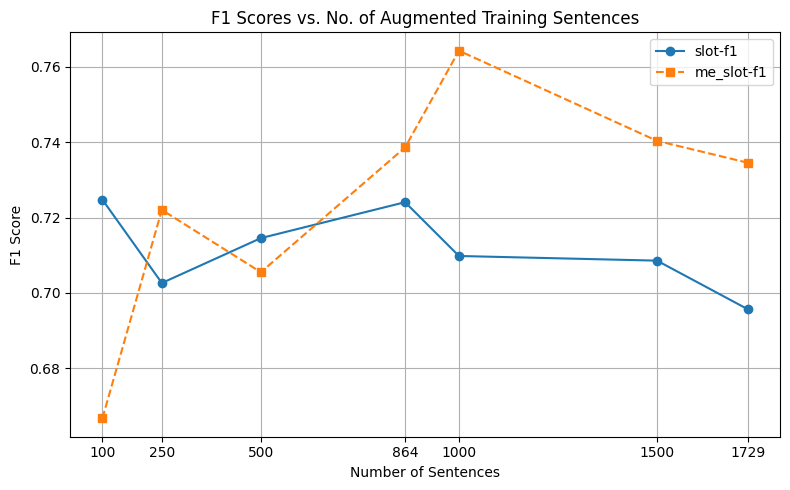

In [20]:
# no. of sentences
x = [100, 250, 500, 864, 1000, 1500, 1729]

plt.figure(figsize=(8, 5))

plt.plot(x, slot_f1_list, marker='o', label='slot-f1')
plt.plot(x, me_slot_f1_list, marker='s', label='me_slot-f1', linestyle='--')

plt.xlabel("Number of Sentences")
plt.ylabel("F1 Score")
plt.title("F1 Scores vs. No. of Augmented Training Sentences")
plt.legend()
plt.grid(True)
plt.xticks(x)  
plt.tight_layout()
plt.show()